In [1]:
import pandas as pd

KNN

# Read the CSV and Perform Basic Data Cleaning

In [3]:
df = pd.read_csv("CHLearnTarget.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,Day-Result,D-AQI,PM10 AQI,NO2 AQI,Ozone AQI,SO2 AQI,CO AQI,PM-WEIGHT,DMax NO2,NO2-WEIGHT,...,SO2-WEIGHT,DMax CO,CO-WEIGHT,Year,Month,Day,Site Name,Lat,Lng,Date
0,Good,44,6,12,44,0,1,1,13.6,24,...,24,0.1,24,2016,1,2,Cheyenne NCore,41.182227,-104.778334,1/2/2016
1,Good,38,8,34,38,0,2,1,36.0,22,...,21,0.2,24,2016,1,3,Cheyenne NCore,41.182227,-104.778334,1/3/2016
2,Good,37,13,37,32,1,2,1,39.5,24,...,24,0.2,24,2016,1,4,Cheyenne NCore,41.182227,-104.778334,1/4/2016
3,Good,37,7,10,37,0,2,1,11.3,23,...,22,0.2,24,2016,1,5,Cheyenne NCore,41.182227,-104.778334,1/5/2016
4,Good,36,7,24,36,0,2,1,25.4,24,...,24,0.2,24,2016,1,6,Cheyenne NCore,41.182227,-104.778334,1/6/2016


In [4]:
df['Day-Result'].unique()

array(['Good', 'Moderate Pollution'], dtype=object)

In [5]:
df.shape

(848, 23)

# Select your features (columns)

In [6]:
# Set features. This will also be used as your x values.
Actual_Results = df["Day-Result"]
Feature_Set = df.drop("Day-Result", axis=1)
#Feature_Set
Feature_Names = Feature_Set.columns
Feature_Names

Index(['D-AQI', 'PM10 AQI', 'NO2 AQI', 'Ozone AQI', 'SO2 AQI', 'CO AQI',
       'PM-WEIGHT', 'DMax NO2', 'NO2-WEIGHT', 'DMax Ozone', 'OZONE-WEIGHT',
       'DMax SO2', 'SO2-WEIGHT', 'DMax CO', 'CO-WEIGHT', 'Year', 'Month',
       'Day', 'Site Name', 'Lat', 'Lng', 'Date'],
      dtype='object')

In [9]:
#using Actual_Results as the y-values
#Actual_Results
X=Feature_Set.iloc[:,1:18]

y=Actual_Results

In [10]:
# Search for top 10 features according to feature importances
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=250,learning_rate=1.0,max_depth=1,random_state=0)
model.fit(X,y)
model.feature_importances_

array([3.61643223e-02, 0.00000000e+00, 9.63830531e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.14651798e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [11]:
# Store the top 10 features as a series, using the column headers as the index
feat_imp = pd.Series(model.feature_importances_, index=X.columns).nlargest(10)
feat_imp

Ozone AQI       0.963831
PM10 AQI        0.036164
DMax Ozone      0.000005
NO2 AQI         0.000000
SO2 AQI         0.000000
CO AQI          0.000000
PM-WEIGHT       0.000000
DMax NO2        0.000000
NO2-WEIGHT      0.000000
OZONE-WEIGHT    0.000000
dtype: float64

In [12]:
# Set features based on feature importances
X = df[feat_imp.index]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [15]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)

# Scale training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Lists to store training and testing scores
train_scores = []
test_scores = []

# Loop through to find the best k value
for k in range (5, 35, 3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train: {train_score:.3f}, Test: {test_score:.3f}")

k: 5, Train: 0.981, Test: 0.967
k: 8, Train: 0.973, Test: 0.943
k: 11, Train: 0.976, Test: 0.967
k: 14, Train: 0.967, Test: 0.958
k: 17, Train: 0.967, Test: 0.958
k: 20, Train: 0.958, Test: 0.948
k: 23, Train: 0.964, Test: 0.953
k: 26, Train: 0.958, Test: 0.948
k: 29, Train: 0.959, Test: 0.948
k: 32, Train: 0.948, Test: 0.939


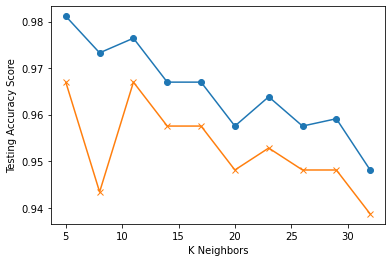

In [18]:
import matplotlib.pyplot as plt

# Plot training and testing scores
plt.plot(range(5, 35, 3), train_scores, marker='o')
plt.plot(range(5, 35, 3), test_scores, marker='x')
plt.xlabel("K Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [19]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

# Initialize new classifer outside of loop
knn2 = KNeighborsClassifier()

# Create the GridSearchCV model
param_grid = dict(n_neighbors=list(range(5, 55)))

best_model = GridSearchCV(knn2, param_grid, cv=100, scoring='accuracy', verbose=1)

In [21]:
# Train the model with GridSearch
best_model.fit(X_train_scaled, y_train)

Fitting 100 folds for each of 50 candidates, totalling 5000 fits


C:\Users\eveba\.conda\envs\Machine_Learning\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 69 members, which is less than n_splits=100.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=100, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                         26, 27, 28, 29, 30, 31, 32, 33, 34, ...]},
             scoring='accuracy', verbose=1)

In [22]:
print(best_model.best_params_)
print(best_model.best_score_)

{'n_neighbors': 5}
0.9735714285714286


In [23]:
# Make predictions
grid_predictions = best_model.predict(X_test_scaled)
df_grid = pd.DataFrame({"Actual":y_test, "Predicted":grid_predictions})
df_grid.head()

,Actual,Predicted
553,Good,Good
762,Moderate Pollution,Moderate Pollution
398,Moderate Pollution,Moderate Pollution
565,Good,Good
3,Good,Good


In [24]:
# Score the model
best_model.score(X_test_scaled, y_test)

0.9669811320754716

# Save the Model

In [25]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'knnGradientBoostChTarget.sav'
joblib.dump(best_model, filename)

['knnGradientBoostChTarget.sav']

In [26]:
# Print Classification Report.
from sklearn.metrics import classification_report
print(classification_report(y_test, grid_predictions))

                    precision    recall  f1-score   support

              Good       0.97      0.99      0.98       189
Moderate Pollution       0.94      0.74      0.83        23

          accuracy                           0.97       212
         macro avg       0.96      0.87      0.91       212
      weighted avg       0.97      0.97      0.97       212

